___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [2]:
import pandas as pd

#### Load Dataset

In [3]:
df = pd.read_csv("C:/Users/hessa/Downloads/Customer_Segmentation/Mall_Customers (1).csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.head()
# spending score درجة الانفاق هذي يحسبونها من سجل الشراء 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [6]:
df.info()
# No missing values >_<

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


---
---

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [9]:
df.shape

(200, 5)

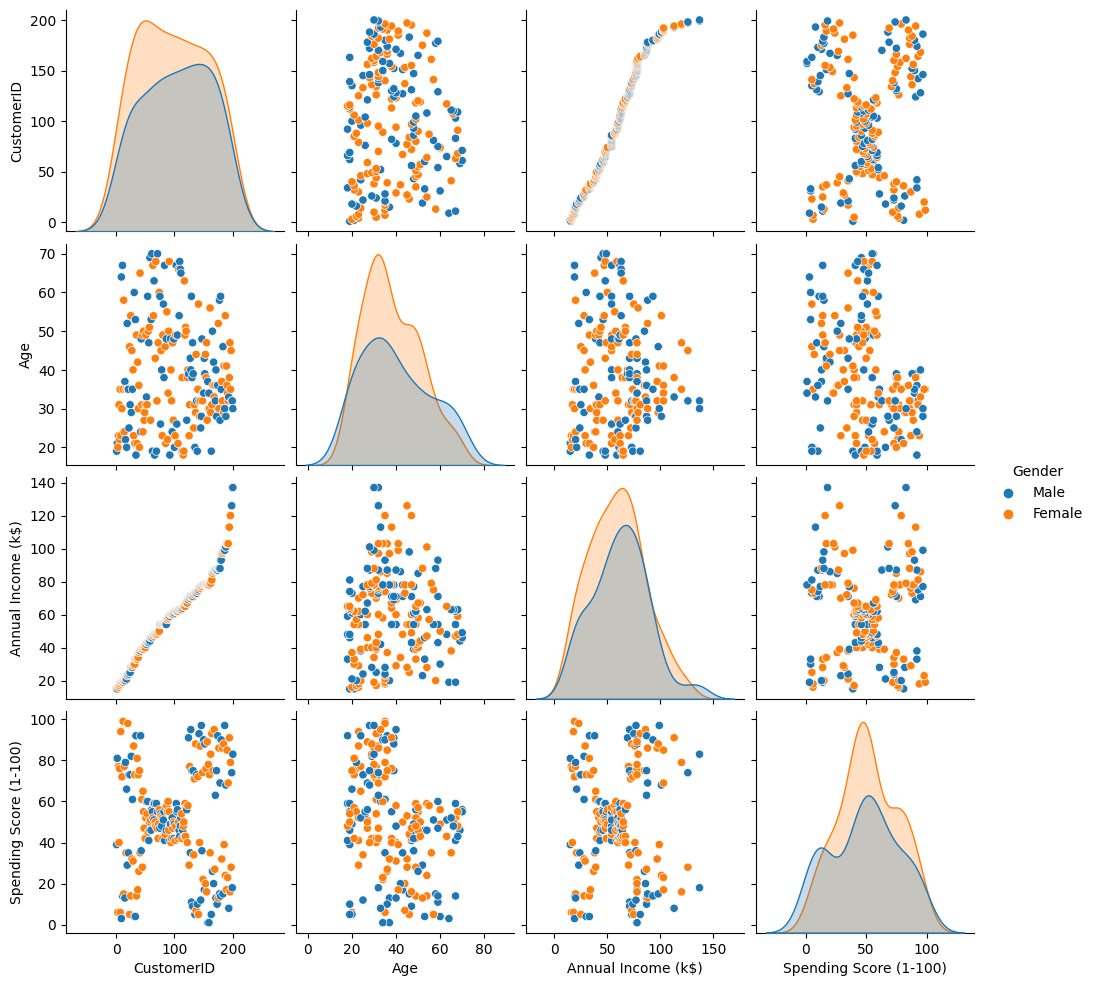

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.pairplot(df, hue="Gender")
plt.show()

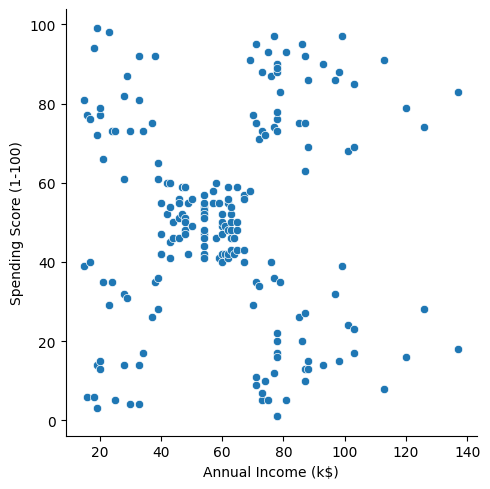

In [11]:
sns.relplot(x='Annual Income (k$)', y= "Spending Score (1-100)", data=df)

In [12]:
# there some relationship with customer who have 40-60 annula incom  

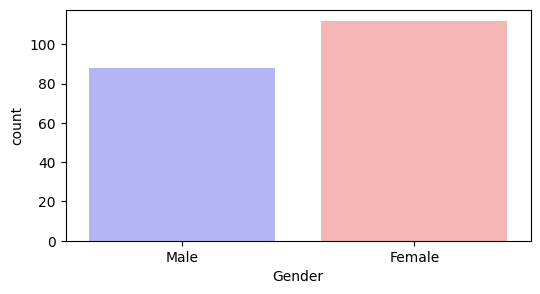

In [13]:
plt.figure(figsize=(6,3))
sns.countplot(x="Gender", data=df, palette="bwr")
plt.show()

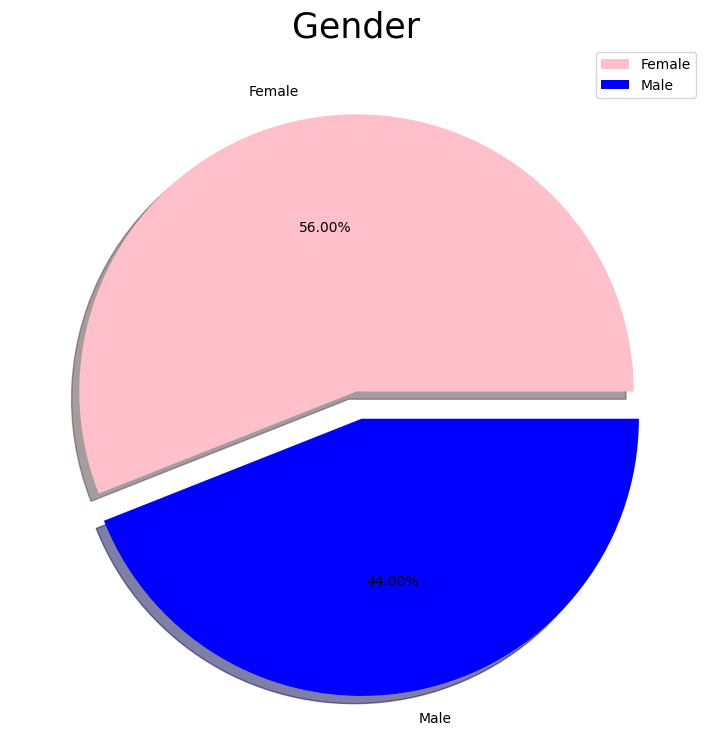

In [64]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'blue']
explode = [0, 0.1]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 25)
plt.legend()
plt.show()

In [14]:
#We should keep in minde the ideal clustering logic which we specify
# as minimal intra-cluster distance and maximmal inter cluster distance 
#at every stage of clustering problems .


# Intra-cluster distance
# It refers to the average distance between data points within the same cluster.

In [15]:
df.drop(columns=['CustomerID'], axis=1, inplace=True)

In [16]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [17]:
%store df

Stored 'df' (DataFrame)


---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [18]:
x = df.loc[:, ["Age", "Spending Score (1-100)"]]
x

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


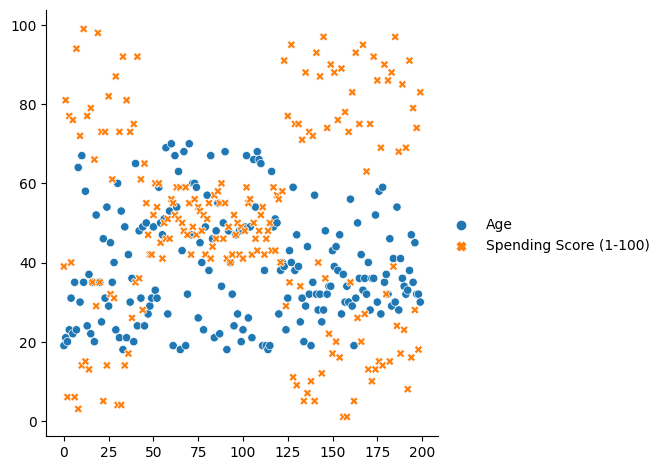

In [19]:
sns.relplot(x)
plt.show()

#### *ii. Determine optimal number of clusters*

In [20]:
# find optimal number 
from sklearn.cluster import KMeans
sum_of_square_error = []
K=range(1,11)
# For each k value, we will initialise k-means and use the inertia attribute to 
# identify the sum of squared distances of samples to the nearest cluster centre.
for k in K:
    Kmeans = KMeans(n_clusters=k)
    Kmeans = Kmeans.fit(x)
    sum_of_square_error.append(Kmeans.inertia_)
    # inertia_ or whithin-cluster-sum-of-square-erro


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

In [21]:
x.ndim

2

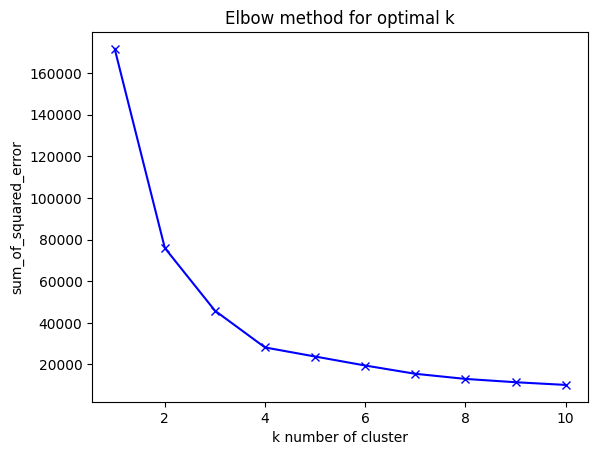

In [22]:
plt.plot(K, sum_of_square_error, 'bx-')

plt.xlabel('k number of cluster')
plt.ylabel('sum_of_squared_error')

plt.title("Elbow method for optimal k")
 
plt.show()

#the plot below ,the elbow is at k=4 indicating the optimal k for this dataset is 4

# elbw graph show us which number of cluster is minimum WCSS value

In [23]:
# we will consider the optimal number of cluster that is sutable for data is 4 


In [24]:
# as u can see the data is devided into 4 clusters (0,1,2,3)

In [25]:
#now check for centroid  


### Why silhouette_score is negative?

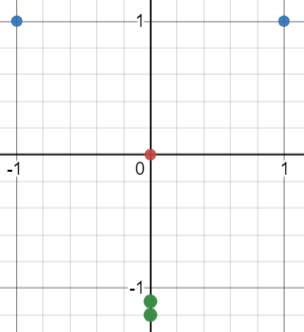

#### *iii. Apply K Means*

In [26]:
Kmeans = KMeans(n_clusters=4, random_state=0)

kmeans_cluster = Kmeans.fit_predict(x)
kmeans_cluster

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [27]:
x['kmeans_cluster'] = kmeans_cluster
x.head()

,Age,Spending Score (1-100),kmeans_cluster
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2


In [28]:
#check for centroid 
Kmeans.cluster_centers_

array([[43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [55.70833333, 48.22916667]])

In [29]:
x.head()

,Age,Spending Score (1-100),kmeans_cluster
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2


#### *iv. Visualizing and Labeling All the Clusters*

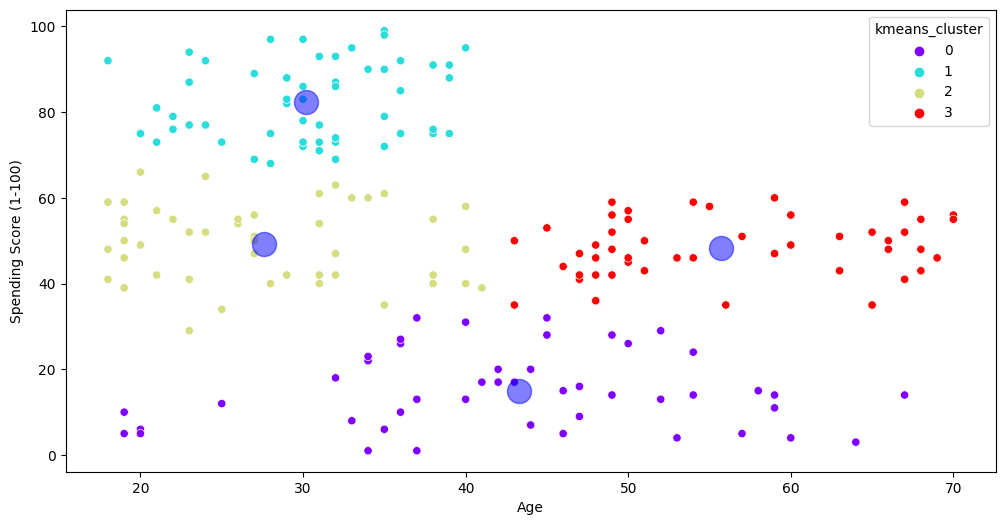

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)',data=x, hue='kmeans_cluster', palette='rainbow')
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], c='blue',s=300 , alpha=0.5);

In [31]:
# plt.figure(figsize=(14,8))
# sns.scatterplot(x='Age', y='Spending Score (1-100)',data=x, hue='kmeans_cluster', palette='rainbow')

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [32]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [33]:
x2 = df.iloc[:,[2,3]].values
x2

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### *ii. Determine optimal number of clusters*

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

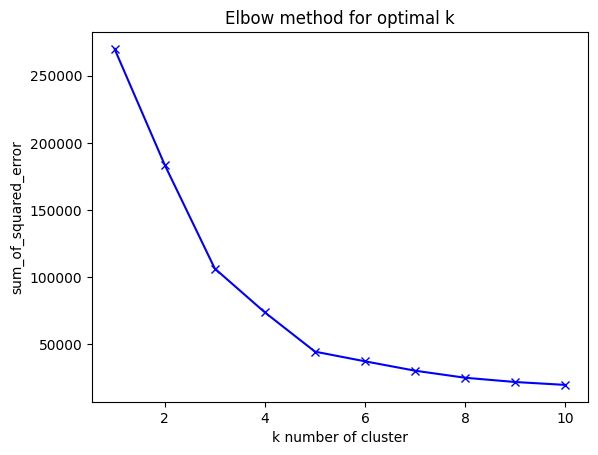

In [34]:
# find the optimal n of clusters Using Elbow Curve Method
sum_of_square_error = []
K=range(1,11)
# For each k value, we will initialise k-means and use the inertia attribute to 
# identify the sum of squared distances of samples to the nearest cluster centre.
for k in K:
    Kmeans = KMeans(n_clusters=k)
    Kmeans = Kmeans.fit(x2)
    sum_of_square_error.append(Kmeans.inertia_)



plt.plot(K, sum_of_square_error, 'bx-')

plt.xlabel('k number of cluster')
plt.ylabel('sum_of_squared_error')

plt.title("Elbow method for optimal k")
 
plt.show()

In [35]:
# we will consider the optimal number of cluster is 5 


#### *iii. Apply K Means*

In [36]:
Kmeans = KMeans(n_clusters=5)
label = Kmeans.fit_predict(x2)
label
#we see n of cluster is 5

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [37]:
Kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

#### *iv. Visualizing and Labeling All the Clusters*

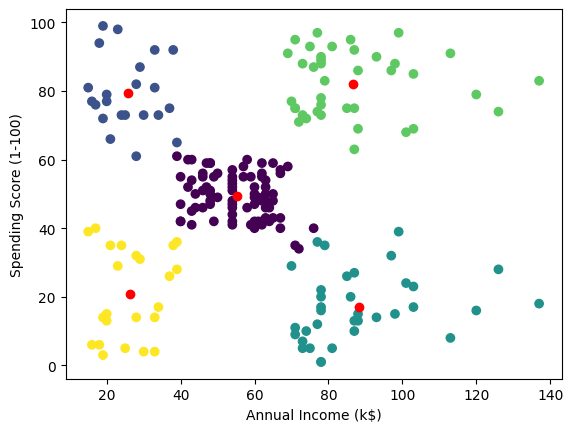

In [38]:
plt.scatter(x=x2[:,0], y=x2[:,1], c=Kmeans.labels_)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
# centroied :
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1], color='red' )
plt.show()

In [39]:
# x3 = df.iloc[:,1:]
# len(x3['Spending Score (1-100)'])

In [40]:
# wcss = []
# K=range(1, 11)
# for k in K:
#     kmeans = KMeans(n_clusters=k)
#     kmeans = kmeans.fit(x3)
#     wcss.append(kmeans.inertia_)

# plt.plot(K,wcss, 'bx-')

# plt.xlabel('k number of cluster')
# plt.ylabel('sum_of_squared_error')

# plt.title("Elbow method for optimal k")
 
# plt.show()

In [41]:
# kmeans = KMeans(n_clusters=5)
# label = kmeans.fit_predict(x3)
# label

### Hierarchical Clustering

In [42]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [43]:
x1 = df.iloc[:,[1,3]]
x1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


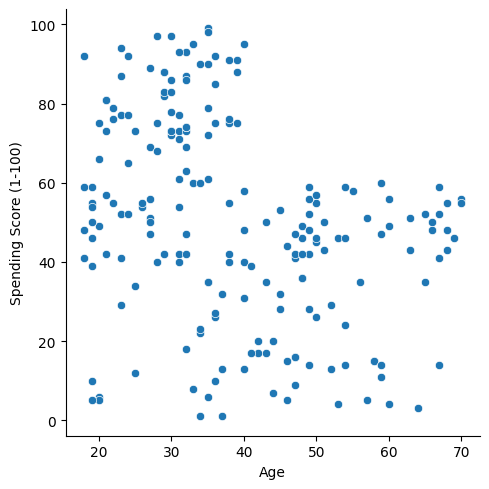

In [44]:
sns.relplot(x='Age', y="Spending Score (1-100)", data=x1)


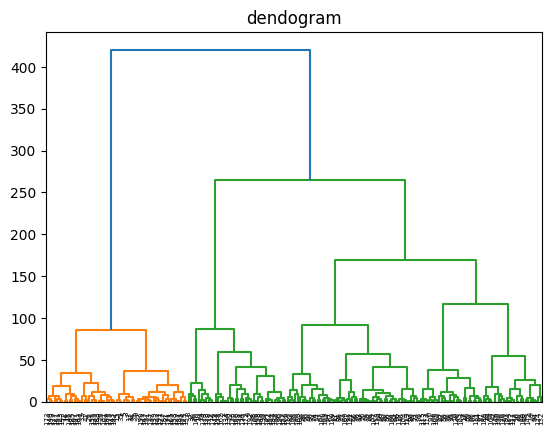

In [45]:
#identify optimal number of clusters using Dendogram
#A dendrogram is a tree-like diagram that records the sequences of merges or splits.

import scipy.cluster.hierarchy as shc
plt.title("dendogram")
dendogram = shc.dendrogram(shc.linkage(x1, method = "ward"))


In [46]:
# as you can see the of optimal no of clusters is = 2 

In [47]:
dendogram

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [80.0, 80.0, 111.25, 111.25],
  [28.125, 28.125, 95.625, 95.625],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [222.5, 222.5, 253.75, 253.75],
  [183.75, 183.75, 238.125, 238.125],
  [152.5, 152.5, 210.9375, 210.9375],
  [61.875, 61.875, 181.71875, 181.71875],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],


In [48]:
dendogram['color_list']

['C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',

In [49]:
unique_color = set(dendogram['color_list'])
unique_color

{'C0', 'C1', 'C2'}

In [50]:
optimal_number_clusters = len(unique_color)- 1
optimal_number_clusters
# the of optimal no of clusters is 2

2

## Clustering based on Annual Income and Spending Score- x2

In [51]:
x2 = df.iloc[:,[2,3]]
x2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0.5, 1.0, 'Dendrogram')

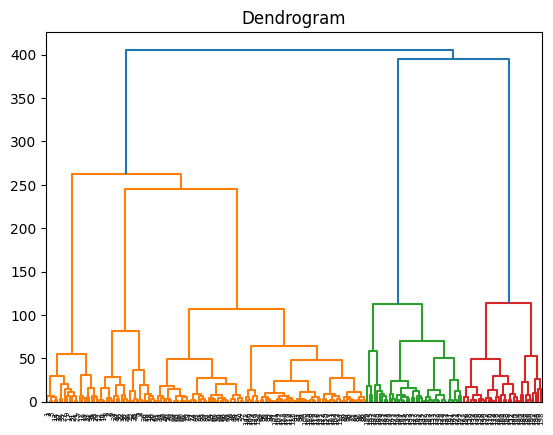

In [52]:
dendogram = shc.dendrogram(shc.linkage(x2, method = "ward"))
plt.title('Dendrogram')

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [53]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(x1)

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [54]:
cl = cluster.fit_predict(x1)

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [55]:
from sklearn.metrics import silhouette_score 
silhouette_score(x1, cl)

0.4549465643222241

#### Annual Income and Spending Score- x2

In [56]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(x2)


c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [57]:
cl2 = cluster.fit_predict(x2)
silhouette_score(x2, cl2)

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.36706444723912895

### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

In [66]:
%store x

Stored 'x' (DataFrame)


#### Annual Income and Spending Score- x2

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___